# Lab01: Initial Value Problems
Due date: 11:59pm September 10, 2019<br>
Connor Poetzinger

###  1. Newton's Method

Create a function *Newtons_Method* to find the root(s) of a function *f(x)*. Start from an initial guess *x0*, to successively better the approximation of the root. If *f(x)* has continuous derivatives, Newton's method will converge to x<sup>*</sup> if our initial guess is reasonable.

\begin{equation*}
x_{k+1} = x_k - \frac{f(x_k)}{f^{'}(x_k)}
\end{equation*}

In [238]:
import numpy as np

def newtons_method(maxIter, tol, f, f_prime, x0):
    """
    Implementation of Newton's Method
    Input: 
        maxIter - maximum number of iterations
        tol - telerance used for stopping criteria 
        f - the function handle for the function f(x)
        f_prime - the function handle for the function's derivative
        x0 - the initial point 
    Output: 
        x1 - approximations 
        iter - numbre of iterations 
    """
    #begin counting iterations 
    iter = 0
    #iterate while the iteration counter is less than your iteration cap and 
    #the function value is not close to 0
    while (iter < maxIter and abs(f(x0)) > tol):
        #Newton's method definition 
        x1 = x0 - f(x0)/f_prime(x0)
        #update counter 
        iter += 1
        #disrupt loop if error is less than your tolerance 
        if (abs(x1 - x0) < tol):
            break
        #update position
        else:
            x0 = x1
    return x1, iter

def f(x):
    """
    Function definition for f(x)
    """
    #return f(x) = x^2 - 1
    return x**2 - 1

def f_prime(x):
    """
    Function definition for the derivative of f(x)
    """
    #return derivative of f(x) = x^2 - 1 --> 2x
    return 2*x

In [239]:
newtons_method(6, 1.0*10**-8, f, f_prime, 2)

(1.000000000000001, 5)

### 2. Lagrange Interpolation

Create a function *lagrange_interp* to find the value of the Lagrange Interpolation polynomial evaluated at a point *x*.

### 3. Euler Methods

##### 3.1 Forward Euler

Create a function, *Forward_Euler* to find an approximate solution *Y<sup>n</sup>*, at discrete time steps.

In [240]:
#import external modules
import numpy as np
import matplotlib.pyplot as plt

# def forward_euler(y0, t0, tf, dt, f):
def forward_euler(f, t, y0, dt):
    """
    Implementation of the Forward Euler method 
    y[i+1] = y[i] + h * f(x[i], y[i]) where f(x[i], y[i]) is the differntial 
    equation evaluated at x[i] and y[i]
    Input:
        f - function f(y,t)
        t - data structure is a numpy array with t[0] initial time and t[-1] final time
        y0 - data structure is a numpy array with initial value 1.0
        dt - data structure is a numpy array time step
    Output:
        x - vector of time steps 
        y - vector of approximate solutions
    """
    #iterate through eatch delta t 
    for h in dt:
        #return evenly spaced values between 0.0 and 1.0+h with itervals of h
        #this creates time intervals  
        x = np.arange(t[0], t[-1]+h, h)
        #initialize temp array to store solution for each dt when t = 1
        temp = np.empty([1, len(x)])
        #initialize y by returning a numpy array with shape 101, filled with zeros 
        #this preallocation is necessary for time reasons and to add values into array
        y = np.zeros(len(x+1))
        #assign time at position 0 to starting time (0.0) and set approximation at time 
        #step 0 = 1.0 which is the initial value given 
        x[0], y[0] = t[0] ,y0
        #apply Euler's method 
        for i in range(1, len(x)):
            y[i] = y[i-1] + h * f(x[i - 1], y[i - 1])
            
#         #enter conditional when time = 1
#         if x.any() == 1:
#             sols = np.append(temp, y)
   
    
#     err = lambda q,p: np.sum(np.abs(q - p)/np.abs(q))
#     err_res = err(exact(ts), sols)
            
                  
    #create plot
    plt.plot(x, y, label="Approximation")
    plt.plot(x, exact(x), label="Exact")
    plt.title("Euler's Method Example, N ="+str(len(x)))
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid()
    
    #return time (x) and approximations (y)
    return x, y


def f(t, y):
    """ 
    IVP function y'(t) to approximate the derivative
    """
    return -(t * (np.exp((-t**2)/2)))

def exact(t):
    """
    IVP function that provides the exact solution  to y(t)
    """
    return np.exp((-t**2)/2)

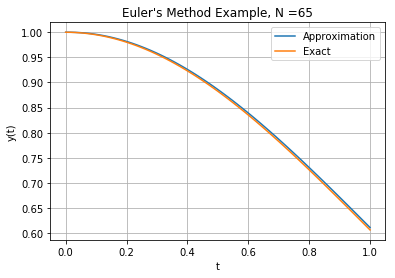

In [241]:
# initial values 
#dt = 1/4
dt = np.asarray([1/(2**x) for x in range(2,7)])
t = np.array([0.0, 1.0])
y0 = np.array([1.0])
ts, ys = forward_euler(f, t, y0, dt)

err = lambda x,y: np.sum(np.abs(x - y)/np.abs(x))
err_res = err(exact(ts), ys)

#### 3.2 Backward Euler